<a href="https://colab.research.google.com/github/maffeidardis/poisson_methodes_numeriques/blob/main/Poisson_TT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Équation de Poisson à 2D par la méthode des différences finies**

Tout d'abord, on vais définir mathematiquement quel est le probléme.
Le méthode plus classique pour ressoudre l'équation de Poisson c'est le méthode des différences finies. Basiquement, on veut remplacer chaque derivative pour um coefficient differentiel dans l'équation original.
L'équation de Poisson a la forme suivante:
<br>
$$ \Delta^2 U = -f(x,y) \tag{1}$$
<br>
Où $\Delta$ c'est l'opérateur Laplacian et $f(x,y)$ c'est la load/source fonction. Si on écrit l'équation dans le plan cartesian, on aurait:
<br>
<br>
$$ \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = f(x,y) \tag{2}$$


On vais considerer une maillage limité à une portion du plan xy. C'est-à-dire, 
<br><br>
$$ \begin{cases}
x_{i} = x_{0} + i\Delta x, \ 0 \leq i \leq I \\
y_{i} = y_{0} + j\Delta y, \ 0 \leq j \leq J 
\end{cases} \tag{3}$$
<br>
Maintenant, on vais écrire la Maille, que doit donner le région que on a décrit dessu. 
Pour faire ça, on vais créer une classe, maille, avec le méthode "getInfos" qui retourne, basée dans le número de subdivision $N$, $dx$, $dy$, $\epsilon x$ et $\epsilon y$ pour la maille carrée defini pour $(x_{i}, y_{i})$ et $(x_{f}, y_{f})$.

In [ ]:
#  Class Maille que donner les infos de la région de la maille carrée defini
#  pour (xi, yi) et (xf, yf)

class Maille():
  def __init__(self, xi, yi, xf, yf, N):
    self.xi = xi
    self.yi = yi
    self.xf = xf
    self.yf = yf
    self.N = N
    
  def getInfos(self):
    dx = (self.xf - self.xi)/(self.N - 1)
    #That's because we are analysing a squared maille
    dy = dx
    epsilonx = dx**(-2)
    epsilony = epsilonx
    return dx, dy, epsilonx, epsilony
  

Classiquement, pour résoudre le probléme numériquement, on doit écrire le development de Taylor à l'ordre 2 de l'équation $(2)$.
<br>
<br>
$$ \begin{cases} 
\frac{\partial^2 u}{\partial x^2} = \frac{u(x + \Delta x,y) + u(x-\Delta x,y) - 2u(x,y)}{\Delta x^2} \\
\frac{\partial^2 u}{\partial y^2} = \frac{u(x,y + \Delta y) + u(x,y - \Delta y) - 2u(x,y)}{\Delta y^2} 
\end{cases} \tag{4}$$
<br>
Si on réecrire l'équation $(2)$ en notation discrète, avec le development de Taylor à l'ordre 2 que on a éffectué en $(4)$, on vais obtenir:
<br>
<br>
$$ \frac{1}{\Delta x^2} (u_{i+1, j} + u_{i-1,j} - 2u_{i,j}) +  \frac{1}{\Delta y^2} (u_{i, j+1} + u_{u, j-1} + 2u_{i,j}) = \rho_{i,j} \tag{5}$$
<br>
Pour simplifier la notation, on remplace $\frac{1}{\Delta x^2}$ pour $\epsilon_{x}$ et $\frac{1}{\Delta y^2}$ pour $\epsilon_{y}$.
<br>
<br>
$$ \epsilon_{x} (u_{i+1, j} + u_{i-1,j} - 2u_{i,j}) + \epsilon_{y} (u_{i, j+1} + u_{u, j-1} + 2u_{i,j}) = \rho_{i,j} \tag{6} $$
<br>
Maintenant, on vais faire le réindexation de $2D$ pour $1D$. C'est-à-dire,
<br>
<br>
$$ \begin{cases} \ 0 \leq i \leq I  \\ 
\ 0 \leq j \leq J \end{cases} \ \Rightarrow \ k = iJ +j, \ 0 \leq k \leq IJ \tag{7} $$
<br>
La nouvelle formulation de la solution c'est:
<br>
<br>
$$ \epsilon_{x} (u_{k+J+1} + u_{k-J-1}) + \epsilon_{y} (u_{k+1} + u_{k-1}) - 2(\epsilon_{x} + \epsilon_{y})u_{k} = \rho_{k} \tag{8} $$
<br>


L'équation $(8)$ peut être réecrire comme un systéme lineaire basée dans 3 vecteurs. Pour la matrix des coefficients:
- Les éléments dans la diagonal auront valeur $-2(\epsilon_{x} + \epsilon_{y})$.
- Les éléments dans les columns k + 1 ou k - 1, c'est-à-dire, juste après le diagonal, auront valeur $\epsilon_{y}$.
- Les éléments dans les columns k + j + 1 ou k - j - 1 auront valeur $\epsilon_{x}$.
Donc, ça resulte en une matrix A comme la suivante:
<br>
<br>
$$ A \ \ \ = \ \ \ \begin{bmatrix}  ...  \\ 
\ \ \ ... \ \ \ \epsilon_{x} \ \ \ ... \ \ \ \epsilon_{y} \ \ \ -2(\epsilon_{x} + \epsilon_{y}) \ \ \ \epsilon_{y} \ \ \  ... \ \ \ \epsilon_{x} \ \ \ ... \ \ \
\\ ... \\ 
\ \ \ ... \ \ \ \epsilon_{x} \ \ \ ... \ \ \ \epsilon_{y} \ \ \ -2(\epsilon_{x} + \epsilon_{y}) \ \ \ \epsilon_{y} \ \ \  ... \ \ \ \epsilon_{x} \ \ \ ... \ \ \
\\ ...
\\ 
\ \ \ ... \ \ \ \epsilon_{x} \ \ \ ... \ \ \ \epsilon_{y} \ \ \ -2(\epsilon_{x} + \epsilon_{y}) \ \ \ \epsilon_{y} \ \ \  ... \ \ \ \epsilon_{x} \ \ \ ... \ \ \
\\ ...
\end{bmatrix} $$
<br>
Maintenant, on vais creer une class avec un méthode, que vais genérer la matrix des coefficientes.

In [ ]:
import numpy as np

#Here we are creating the coefficients matrix
class Matrice():
  def __init__(self, epsilonx, epsilony, dim):
    self.epsilonx = epsilonx
    self.epsilony = epsilony
    self.dim = dim
  
  #Method that creates the coefficient matrix based on the Dirichlet Condition
  def generateMatrix(self):
    #Some values that we are going to use in the loop to create the matrix
    dim2d = self.dim**2
    coefMatrix = np.zeros((dim2d, dim2d))

    #Here is the loop to create the matrix
    for index in range((dim2d)):
      coefMatrix[index, index] = -2*(self.epsilony + self.epsilony)
      if index - 1 >= 0:
        coefMatrix[index, index - 1] = self.epsilonx
      if index + 1 <= dim2d -1:
        coefMatrix[index, index + 1] = self.epsilonx
      if index + self.dim <= dim2d -1:
        coefMatrix[index, index + self.dim] = self.epsilony
      if index - self.dim >= 0:
        coefMatrix[index, index - self.dim] = self.epsilony

    return coefMatrix

Maintenat, on doit trouver la charge pour, après, résoudre l'équation de Poisson.

In [ ]:
import numpy as np

#That's a class for the Charge
class Charge():
  def __init__(self, dx, dy, xmin, xmax, y1, y2, N, dq):
    self.dx = dx
    self.dy = dy
    self.xmin = xmin
    self.xmax = xmax
    self.y1 = y1
    self.y2 = y2
    self.N = N
    self.dq = dq

  #Here, we generate the charge based on the conditions specifieds in the PDF
  def generateCharge(self):
    jmin = round(self.xmin/self.dx)
    jmax = round(self.xmax/self.dx)
    i1 = round(self.y1/self.dy)
    i2 = round(self.y2/self.dy)
    m = np.zeros((self.N, self.N))
    for j in range(jmin, jmax):
        m[i1, j] = self.dq
        m[i2, j] = -self.dq

  #Here we do the transformation in a 1D vector, such as explained above
    n = np.zeros(self.N**2)
    for i in range(self.N):
      for j in range(self.N):
        n[i*self.N + j] = m[i,j]
    return m,n 

    

Ici, on a une fonction que applique le méthode de Jacobi pour faire l'inversion d'une matrice

In [ ]:
import numpy as np


def Jacobi(A, b, N, x_i): 
    D = np.diag(A)
    R = A - np.diagflat(D)
    for i in range(N):
        x = (b - R.dot(x_i))/D
        x_i = x
    return x  

Maintenant, on doit résoudre l'équation de Poisson. Pour ça, on vais initialiser le problème posé avec des conditions du prémier example présenté dans le document.


In [ ]:
#Here, all the constants
N = 65
epsilon_0 = 8.85418782e-12


#Maintenant, on doit initiliaser tout les classes
maille = Maille(0, 0, 1, 1, N)
dx, dy, epsilonx, epsilony = maille.getInfos()

matrice = Matrice(epsilonx, epsilony, N)
nabla = matrice.generateMatrix()

charge = Charge(dx, dy, 0.25, 0.75, 0.4, 0.6 , N, 1)
rho, rho_k = charge.generateCharge()
print(nabla)

[[-16384.   4096.      0. ...      0.      0.      0.]
 [  4096. -16384.   4096. ...      0.      0.      0.]
 [     0.   4096. -16384. ...      0.      0.      0.]
 ...
 [     0.      0.      0. ... -16384.   4096.      0.]
 [     0.      0.      0. ...   4096. -16384.   4096.]
 [     0.      0.      0. ...      0.   4096. -16384.]]


Pour résoudre l'Équation de Poisson, on doit faire l'inversion d'une matrice 4225 x 4225 

In [ ]:
#Since it takes time to inverse the matrice, it's nice to separete it in an unique code cell
#So, if any adjust is necessary in other part, we don't have to run the inversion again

inv_Matrix = Jacobi(nabla, -rho_k/epsilon_0, int(1e2), np.ones(len(rho_k)))

In [ ]:
potential_poisson = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        potential_poisson[i,j] = inv_Matrix[i*N+j]

Maintenant, il faut plotter les résultats.

Text(0.5, 1.0, ' Solution de l Équation de Poisson pour le potential: $\\nabla^2 u = -\\rho/\\epsilon_0$')

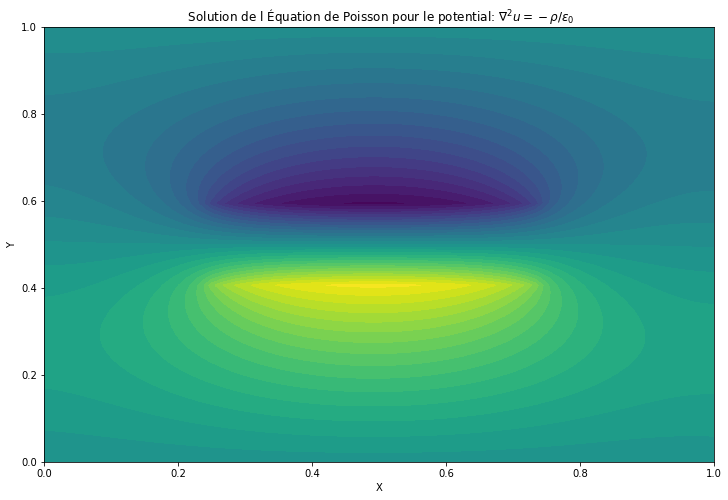

In [ ]:
import matplotlib.pyplot as plt

#Plot of the solution
plt.figure(figsize = (12,8))
plt.contourf([xi * dx for xi in range(N)],[yi * dy for yi in range(N)], pot_u, 30)

plt.xlabel('X')
plt.ylabel('Y')
plt.title(r' Solution de l Équation de Poisson pour le potential: $\nabla^2 u = -\rho/\epsilon_0$')